In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
#using a function to extract
def extract_file():
    file_path = os.getcwd()#checking the current working directory
    if os.path.exists(f"{file_path}/data_folder"):#checking if the file path does exist in our pc
        data_folder_path = f"{file_path}/data_folder"
        magic_data_df = pd.read_csv(f"/{data_folder_path}/magic04.data")#opening the link to the .data file to read it
    else:
        print("Error")
    return magic_data_df


df = extract_file()
    

In [3]:
df

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   28.7967  19019 non-null  float64
 1   16.0021  19019 non-null  float64
 2   2.6449   19019 non-null  float64
 3   0.3918   19019 non-null  float64
 4   0.1982   19019 non-null  float64
 5   27.7004  19019 non-null  float64
 6   22.011   19019 non-null  float64
 7   -8.2027  19019 non-null  float64
 8   40.092   19019 non-null  float64
 9   81.8828  19019 non-null  float64
 10  g        19019 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

28.7967    0
16.0021    0
2.6449     0
0.3918     0
0.1982     0
27.7004    0
22.011     0
-8.2027    0
40.092     0
81.8828    0
g          0
dtype: int64

In [6]:
#since the column names dont exist in this dataset we are naming them as below using the olumns attribute
column_name = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df.columns = column_name
"""
Or we can name the columns when we open the csv file ie
column_name = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
magic_data_df = pd.read_csv(f"/{data_folder_path}/magic04.data", names = column_name)
such when you call magic_data_df we get the column names added
"""

'\nOr we can name the columns when we open the csv file ie\ncolumn_name = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]\nmagic_data_df = pd.read_csv(f"/{data_folder_path}/magic04.data", names = column_name)\nsuch when you call magic_data_df we get the column names added\n'

In [7]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [8]:
"""creating a new column we need to convert  class ie g and h to g being 1 and h 0 since we will be using classification
In Machine Learning, classification is the task of predicting categories or labels for input data.
You give the model:Input features → measurable attributes (e.g., height, weight, text, pixels).
Target labels → discrete classes (e.g., "spam" or "not spam") or in our case g is 1 and h i.(in our case i have overwritten on top)"""
df["class"] = (df["class"]=="g").astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


## EDA

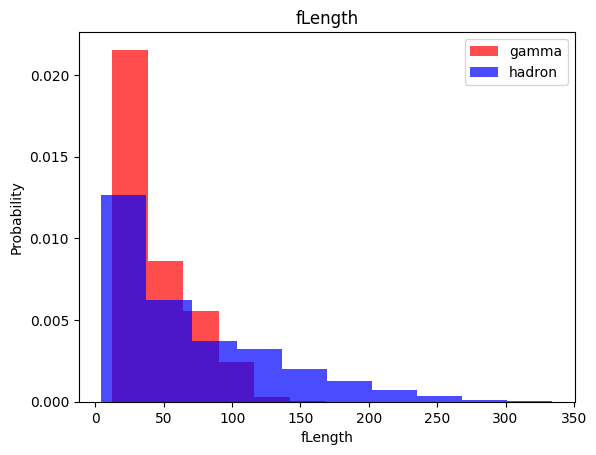

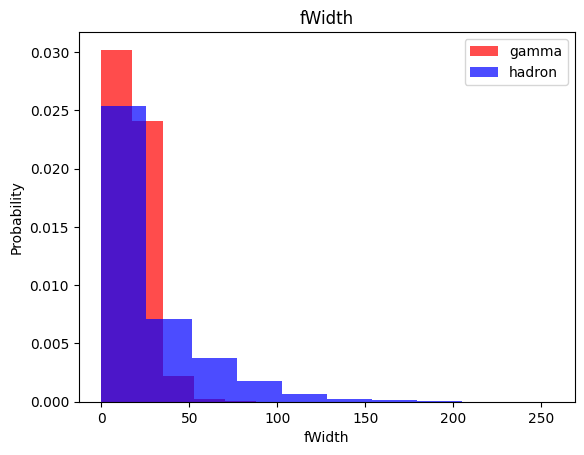

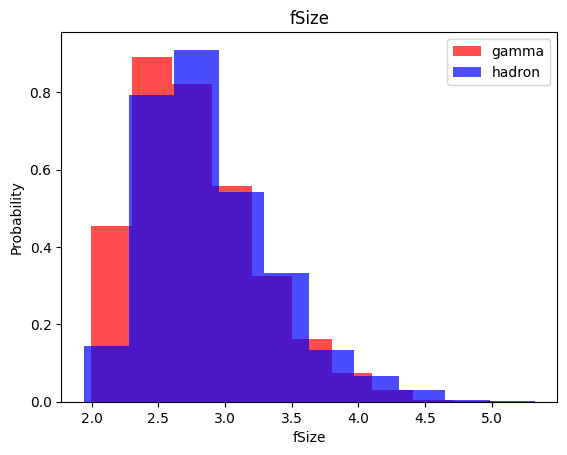

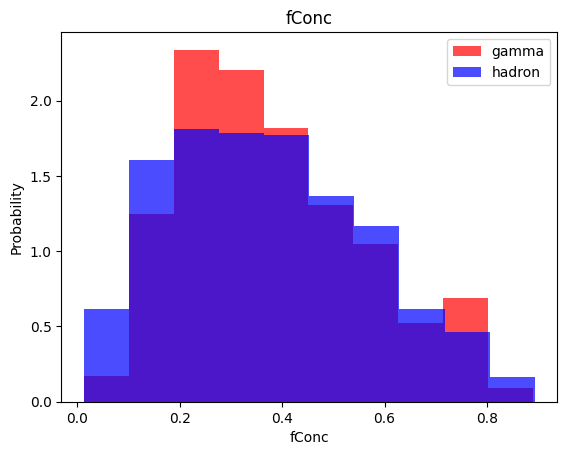

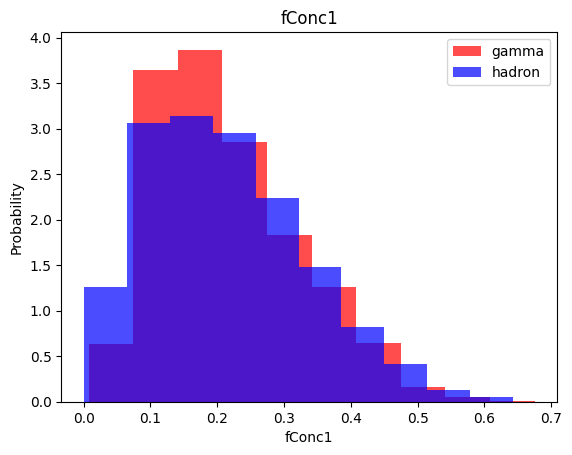

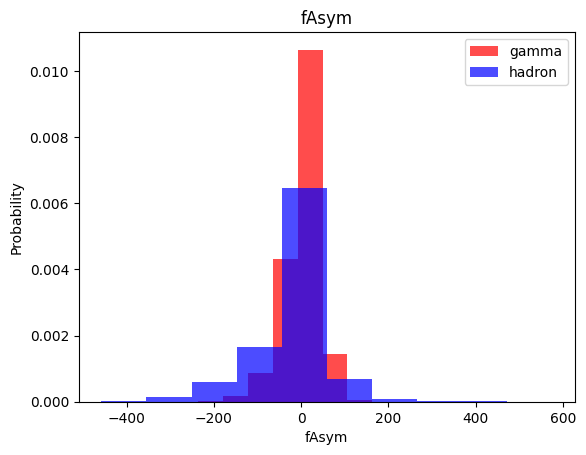

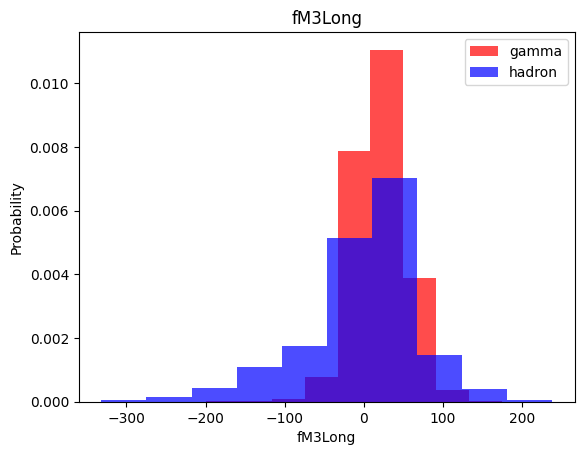

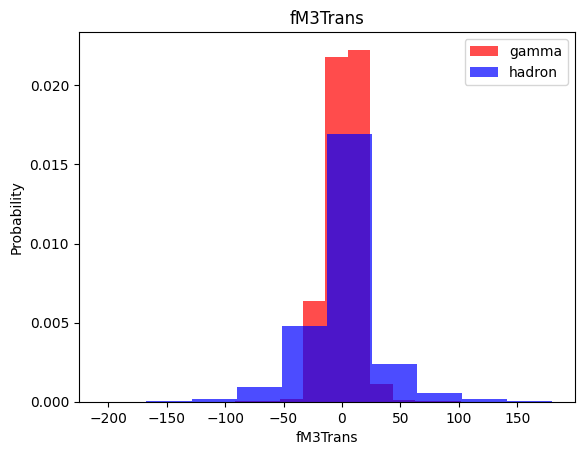

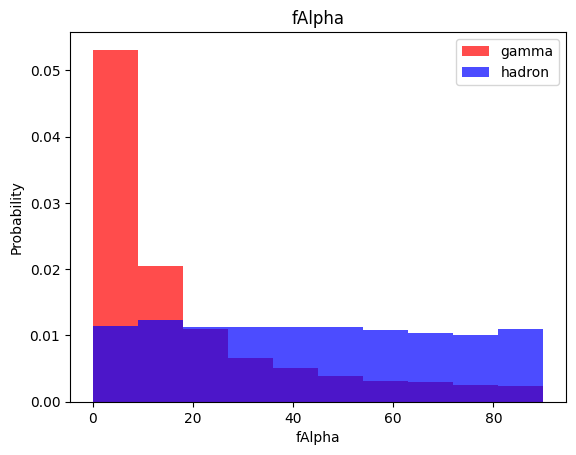

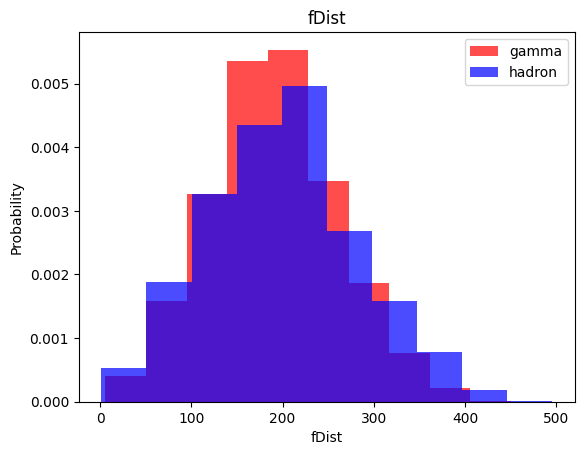

' Iterating over the items in column_name and taking each item except the last one, once \nin the loop we plot a histogram to show the distribution of each column name and how it relates to \ngamma or hadron as we are filtering data for each (df[df["class"]==1]) and then we take the columns named by the current item ie [item]\ndensity=True normalizes the histogram so that the area under the histogram = 1.'

In [9]:
for item in column_name[:-1]:
    plt.hist(df[df["class"]==1][item], color="red",label="gamma",alpha = 0.7, density=True)
    plt.hist(df[df["class"]==0][item], color="blue",label="hadron",alpha = 0.7, density=True)
    plt.title(item)
    plt.ylabel("Probability")
    plt.xlabel(item)
    plt.legend()
    plt.show()
""" Iterating over the items in column_name and taking each item except the last one, once 
in the loop we plot a histogram to show the distribution of each column name and how it relates to 
gamma or hadron as we are filtering data for each (df[df["class"]==1]) and then we take the columns named by the current item ie [item]
density=True normalizes the histogram so that the area under the histogram = 1."""

### Train, validate ,test

In [10]:
#train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])
#this will be depricated but we can use sklearn

In [11]:
train,temp = train_test_split(df, test_size=0.4,shuffle=True, random_state=42)
test,valid = train_test_split(temp, test_size=0.5,shuffle=True, random_state=42)

In [12]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
16772,19.9856,12.7567,2.6459,0.3979,0.2036,2.7455,0.5936,5.2597,42.7667,227.7910,0
4274,30.8233,9.9406,2.4631,0.5439,0.3391,-26.7711,-25.2821,-7.1803,31.3026,148.1870,1
10319,70.5067,21.9276,3.4431,0.1997,0.1011,65.3210,64.9085,-13.5131,5.4805,196.0730,1
5400,98.6723,38.6109,3.8953,0.1425,0.0715,-178.7700,71.3121,26.8192,0.6137,362.3410,1
5196,45.5285,24.1248,2.8303,0.2749,0.1412,44.7976,21.9637,-16.8318,6.5110,241.3840,1
...,...,...,...,...,...,...,...,...,...,...,...
11284,66.9575,40.3173,4.1294,0.0827,0.0424,62.7680,44.2846,-22.5145,3.9960,181.4330,1
11964,73.8130,20.0997,3.3252,0.2081,0.1152,-91.8746,59.6360,13.6028,5.7286,247.3950,1
5390,34.9637,14.2201,2.7709,0.3441,0.1856,7.8959,22.0566,10.7789,8.1460,175.8270,1
860,36.2836,17.3307,2.6915,0.3438,0.1780,0.7674,22.2398,-11.6439,24.1910,148.5680,1


In [13]:
"""
when we inspect the dataset we see that some columns have values in the hundreds while others lower that 1ie 0.08.
This makes the scale of these numbers to be way offand sometimes affect our results/output. so want we would want 
to do is scale these values in particular column so that they are relative say to the mean and the standard deviation of that column
hence need to create a function that scale data set
"""
"""as seen above since we cannot have differrent len of gamma and hadron and they need to be of the same length we can sort this issue
by ensuring we oversample our training dataset ie by increasng the no. of hadrons, so that they match better. by importing from imblerarn.
oversampling
"""
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values#taking the values of each columns except the last one to be a df 
    y = dataframe[dataframe.columns[-1]].values#taking only the values of the last column

    scaler = StandardScaler()
    
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)#this takes the less class ie hedron and keep sampling from there to increase the size of our smaller class
        #till it matches those of gamma this method is used since we have 2 classes gamma and hedron
    data = np.hstack((X, np.reshape(y,(-1,1))))#since numpy is very particular about dimensions and x is a 2d hence no need to reshape but...
    #y is 1 dimesional vector we need to to call .reshape to reshape it into a 2d item. The -1 means infer what the dimension value would be
    #...which is actually len(y) 
    #hstack means we are stacking them side by side and not horizontally

    return data, X, y

In [14]:
#print(len(train[train["class"]==1]))#checking the number of gamma items in our train dataset that we split earlier
#print(len(train[train["class"]==0]))#checking the number of hadron items in our train dataset that we split earlier

In [15]:
#AFTER DOING OVERSAMPLING
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)#this is False aswe arent oversampling the valid and test data
test, X_test, y_test = scale_dataset(test, oversample=False)

In [16]:
len(y_train)
#chekng if the over sampling has occured on the y train==0 since in the previous print statement they were way low line 16-18

14792

In [17]:
sum(y_train==1)


np.int64(7396)

In [18]:
sum(y_train==0)

np.int64(7396)

## checking on the models


### 1. K-nearest neighbor(KNN)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=5)#we can pass in a parameter of how many neighbors rem we should use 3 or 5
knn_model.fit(X_train,y_train)
#we are training the KNN model using Xtrain and y train ie supervised learning showing if we have this values expected outup should be such

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [45]:
y_predict = knn_model.predict(X_test)

In [46]:
y_predict

array([1, 1, 1, ..., 1, 0, 1], shape=(3804,))

In [47]:
y_test

array([1, 1, 1, ..., 0, 1, 1], shape=(3804,))

In [48]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1356
           1       0.84      0.86      0.85      2448

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.80      0.81      0.80      3804



### 2. Niave Bayes
